In [1]:
import sys
sys.path.append('../src')
import key
dolar_series_id = 'DEXBZUS'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from fredapi import Fred

In [3]:
# Create Fred object.
fred = Fred(api_key=key.apiKey)


In [4]:
# Get series from freed.
data_dolar = fred.get_series(dolar_series_id)

In [24]:
# for dolar
# Reset serie index.
df_dolar = data_dolar.reset_index()

# Convert in dataframe.
df_dolar.columns = ['date', 'exchange_rate']  # Rename columns.

df_dolar['date'] = pd.to_datetime(df_dolar['date'])


In [25]:
df_dolar

,date,exchange_rate
0,1995-01-02,0.8440
1,1995-01-03,0.8450
2,1995-01-04,0.8450
3,1995-01-05,0.8430
4,1995-01-06,0.8400
...,...,...
7835,2025-01-13,6.1089
7836,2025-01-14,6.0506
7837,2025-01-15,6.0466
7838,2025-01-16,6.0448


In [28]:
# Data específica para busca
data_especifica = "2019-01-02"

# Converter para formato de data
data_especifica = pd.to_datetime(data_especifica)

# Filtrar o DataFrame
filtro = df_dolar[df_dolar["date"] == data_especifica]

# Exibir os resultados
if not filtro.empty:
    print(f"Dados encontrados para {data_especifica.date()}:\n{filtro}")
else:
    print(f"Nenhum dado encontrado para {data_especifica.date()}.")


Dados encontrados para 2019-01-02:
           date  exchange_rate
6262 2019-01-02         3.8123


In [29]:
import requests

# Data desejada
data_desejada = "2019-01-02"

# URL base da AwesomeAPI para dados históricos
url = f"https://economia.awesomeapi.com.br/json/daily/USD-BRL/1?start_date={data_desejada.replace('-', '')}&end_date={data_desejada.replace('-', '')}"

# Realizar a requisição
response = requests.get(url)

if response.status_code == 200:
    dados = response.json()
    if dados:
        # Extrair o valor do dólar para BRL na data especificada
        taxa_brl = dados[0].get("bid")
        if taxa_brl:
            print(f"Data: {data_desejada}")
            print(f"Taxa de câmbio (USD para BRL): R$ {taxa_brl}")
        else:
            print("Não foi possível encontrar a taxa de câmbio para BRL.")
    else:
        print(f"Nenhum dado encontrado para a data {data_desejada}.")
else:
    print(f"Erro na requisição: {response.status_code}")


Data: 2019-01-02
Taxa de câmbio (USD para BRL): R$ 3.8858


In [16]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def obter_serie_historica_dolar(start_date, end_date):
    """
    Obtém a série histórica de câmbio USD para BRL da API AwesomeAPI.
    
    Parâmetros:
    - start_date: Data inicial no formato 'YYYY-MM-DD'.
    - end_date: Data final no formato 'YYYY-MM-DD'.

    Retorna:
    - DataFrame com as taxas de câmbio e datas.
    """
    url_base = "https://economia.awesomeapi.com.br/json/daily/USD-BRL/365"
    start_date = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime(end_date, "%Y-%m-%d")
    
    data_atual = end_date
    dados_completos = []

    while data_atual >= start_date:
        # Ajustar intervalo para até 365 dias
        data_final = data_atual.strftime("%Y%m%d")
        data_inicial = max(start_date, data_atual - timedelta(days=364)).strftime("%Y%m%d")
        
        # Construir URL com intervalo de datas
        url = f"{url_base}?start_date={data_inicial}&end_date={data_final}"
        
        # Fazer requisição
        response = requests.get(url)
        if response.status_code == 200:
            dados = response.json()
            dados_completos.extend(dados)
        else:
            print(f"Erro na requisição: {response.status_code}")
        
        # Atualizar data atual
        data_atual -= timedelta(days=365)

    # Organizar os dados em um DataFrame
    if dados_completos:
        df = pd.DataFrame(dados_completos)
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")  # Converter timestamps
        df = df.sort_values("timestamp")  # Ordenar por data
        df = df[["timestamp", "bid", "ask"]]  # Selecionar colunas importantes
        df.columns = ["Data", "Taxa de Compra (USD-BRL)", "Taxa de Venda (USD-BRL)"]
        return df
    else:
        print("Nenhum dado encontrado.")
        return None

# Chamar a função para obter dados de 2019 a 2024
serie_historica = obter_serie_historica_dolar("2019-01-01", "2024-12-31")

# Salvar os dados em um arquivo CSV
if serie_historica is not None:
    serie_historica.to_csv("serie_historica_usd_brl.csv", index=False, sep=";")
    print("Série histórica salva em 'serie_historica_usd_brl.csv'")


C:\Users\kaio\AppData\Local\Temp\ipykernel_11032\1315118597.py:45: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")  # Converter timestamps


Série histórica salva em 'serie_historica_usd_brl.csv'


In [19]:
data_dolar_2 = pd.read_csv("serie_historica_usd_brl.csv",delimiter=";")

In [20]:
data_dolar_2

,Data,Taxa de Compra (USD-BRL),Taxa de Venda (USD-BRL)
0,2019-01-02 11:52:32,3.8858,3.8871
1,2019-01-04 19:26:56,3.7204,3.7216
2,2019-01-07 19:39:44,3.7349,3.7360
3,2019-01-08 17:53:04,3.7268,3.7280
4,2019-01-09 18:52:48,3.6901,3.6913
...,...,...,...
1834,2024-12-26 22:30:24,6.1808,6.1818
1835,2024-12-27 21:28:32,6.1926,6.1936
1836,2024-12-28 00:00:00,6.1964,6.1974
1837,2024-12-30 20:58:40,6.1778,6.1784


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


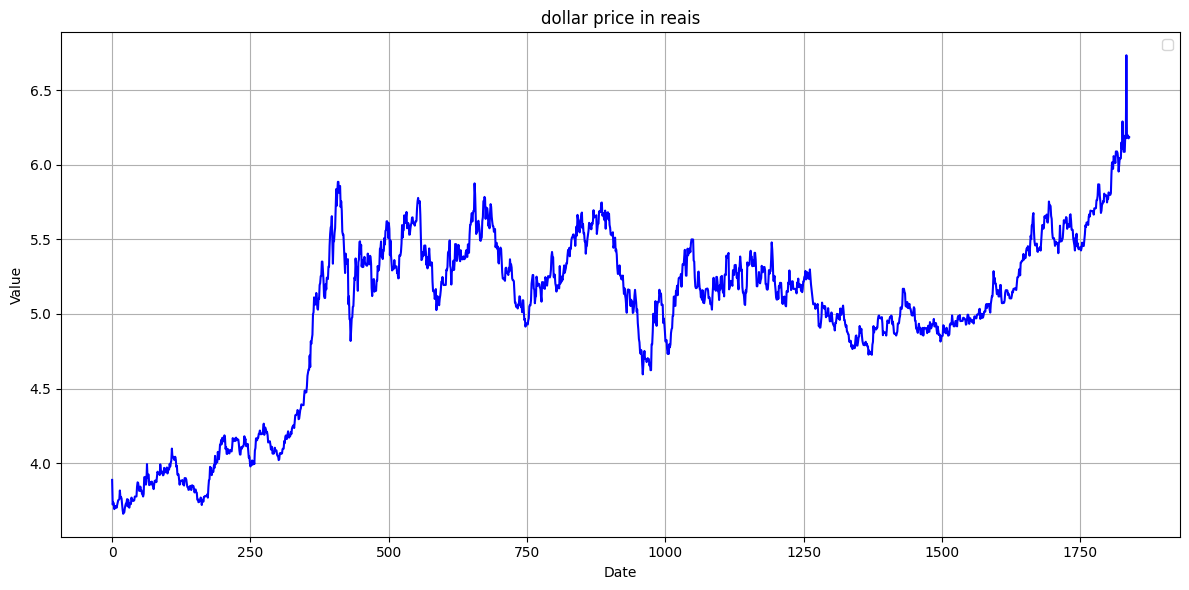

In [21]:
# Plotar valores reais e previstos para a cidade
plt.figure(figsize=(12,6))
plt.plot(data_dolar_2['Taxa de Venda (USD-BRL)'],  color='blue')

# Títulos e legendas
plt.title('dollar price in reais')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show() 

In [22]:
rows_all_nan = data_dolar_2.isnull().all(axis=1)


has_empty_rows = rows_all_nan.any()

# print empty rows
empty_rows = data_dolar_2[rows_all_nan]

print("empty rows:")
print(empty_rows)


empty rows:
Empty DataFrame
Columns: [Data, Taxa de Compra (USD-BRL), Taxa de Venda (USD-BRL)]
Index: []
